<a href="https://colab.research.google.com/github/rahulkumar-datascientist/Logistic-Regression-and-K-Fold-cross-validation-from-scratch/blob/main/ML_Assignment_2_20230113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Assignment 2 - Implementing Logistic Regression and performing K-Fold cross validation from scratch 

And comparing with a reference sklearn model implementation

# Import important libraries

In [ ]:
import pandas as pd                                 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_curve,auc
from IPython.display import display 

### 1. Data Pre-processing

In [ ]:
# Read the beer.txt file into pandas dataframe using delimiter \t and explicitly gives names of columns using a list.
data = pd.read_csv('beer.txt', sep = '\t', 
                   names=["calorific_value", "nitrogen", "turbidity", "style", "alcohol", "sugars", "bitterness", "beer_id", "colour", "degree_of_fermentation"])
data.head()

,calorific_value,nitrogen,turbidity,style,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
0,41.721239,0.503276,2.628182,ale,4.015385,16.73,10.452789,93,13.44,55.337143
1,42.429204,0.525512,1.776364,ale,4.092308,16.72,10.999526,103,12.24,58.380000
2,45.880531,0.443233,2.628182,ale,4.276923,16.68,13.456368,178,10.92,58.382857
3,45.305310,0.471668,1.806364,ale,4.126154,18.84,9.202737,166,10.92,58.525714
4,38.977876,0.392846,2.272727,ale,4.015385,16.77,9.457895,44,10.56,58.900000


Data Cleansing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calorific_value         154 non-null    float64
 1   nitrogen                154 non-null    float64
 2   turbidity               154 non-null    float64
 3   style                   154 non-null    object 
 4   alcohol                 154 non-null    float64
 5   sugars                  154 non-null    float64
 6   bitterness              154 non-null    float64
 7   beer_id                 154 non-null    int64  
 8   colour                  154 non-null    float64
 9   degree_of_fermentation  154 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.2+ KB


From info we find that there are no null values present in any attribute.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
calorific_value,154.0,41.654580,2.614145,37.075221,39.254425,41.699115,44.011062,45.880531
nitrogen,154.0,0.320873,0.129646,0.107013,0.228851,0.285059,0.397022,0.742774
turbidity,154.0,1.885077,0.925583,0.290909,1.224318,1.737273,2.356591,5.217273
alcohol,154.0,4.006114,0.249450,3.393846,3.806154,4.023077,4.216923,4.563077
sugars,154.0,17.335909,1.116810,15.740000,16.592500,16.865000,18.082500,20.650000
bitterness,154.0,8.843541,3.344297,2.730211,6.182474,9.165263,11.382553,20.063789
beer_id,154.0,90.363636,50.862729,1.000000,46.250000,92.000000,132.750000,178.000000
colour,154.0,11.338130,2.789146,5.760000,9.030000,11.520000,13.290000,20.520000
degree_of_fermentation,154.0,65.963868,7.544715,37.034286,62.211071,66.015714,70.925714,87.238571


From describe function it can be inferred that there are no outliers present in data as 75th percentile and max values in 
each attribute are very close. Another important thing that can be inferred is that all attributes are pf very different 
scales which could effect the model so need to implement Normalization to bring all attributes to a common scale.

In [ ]:
#  As beer id provides no important information in the data and also has high correlation with calorific value so we can drop beer id column 
data.drop(columns=['beer_id'], inplace=True)

In [ ]:
#Splitting the independent variables and target variable

feature_columns = data.columns.difference( ['style'] )

#Implement Z-Normalization
data[feature_columns] = StandardScaler().fit_transform(data[feature_columns])
data[feature_columns]

,alcohol,bitterness,calorific_value,colour,degree_of_fermentation,nitrogen,sugars,turbidity
0,0.037286,0.482762,0.025583,0.756048,-1.413095,1.411519,-0.544306,0.805470
1,0.346663,0.646778,0.297287,0.324405,-1.008469,1.583594,-0.553289,-0.117837
2,1.089169,1.383812,1.621845,-0.150402,-1.008089,0.946878,-0.589222,0.805470
3,0.482789,0.107756,1.401086,-0.150402,-0.989093,1.166921,1.351169,-0.085319
4,0.037286,0.184301,-1.027272,-0.279895,-0.939322,0.556960,-0.508373,0.420184
...,...,...,...,...,...,...,...,...
149,1.633673,-0.850529,-0.653678,-1.617988,1.169291,-0.373661,-0.589222,3.611850
150,0.693166,-0.450798,-0.619715,-0.884195,1.186577,0.209294,0.219274,1.055758
151,1.373796,-0.446250,0.891640,-1.445331,1.320503,-0.418672,1.584734,2.049027
152,0.618916,-1.679944,1.418067,-0.236731,1.358876,-0.505658,0.749288,-0.632208


In [ ]:
data['style'].value_counts()

lager    54
ale      52
stout    48
Name: style, dtype: int64

In [ ]:
#Preprocessing dataset for algorithm
X = data[feature_columns]
target_map_dict = {'stout':0, 'ale':1, 'lager':2}                 # Dictionary to Map the object values of target variable to integer for model building
target_remap_dict = {0 :'stout' , 1 :'ale' , 2 :'lager'}          # Remap the intgers values of target variables to their object names.
y = data['style'].map(target_map_dict)                            # Map the object values of target variable to integer for model building
y_unique = np.unique(y)                                           # All uniques calsses in target variable

### 2. Modelling Logistic Regression

In [ ]:
# Modelling logistic regression

# Sigmoid function
def sigmoid(h):
    return 1.0 / (1 + np.exp(-h))                   # Function to map the predicted values to probabilites

def logisticRegression(X, y,theta,num_iter):
       
    #Cost function
    def costFunc(theta, X, y,y_pred):               # Cost Function to minimize the error(absolute difference between y_actual and y_predicted)
        return (1 / len(y)) * (-y.T.dot(np.log(y_pred)) - (1 - y).T.dot(np.log(1 - y_pred)))
    
    #Gradient descent function 
    def gradientFunc(theta, X, y, y_pred):          # Function to reduce the cost value
        m, n = X.shape                              # Find the shape of the feature array
        theta = theta.reshape((n, 1))
        y = y.reshape((m, 1))
        return ((1 / m) * X.T.dot(y_pred - y)) + (theta /m)             # Return the delta or difference from theta to get closer to y_actual
    
    #Finding best theta
    min_cost = 10000000
    for i in range(num_iter):                               # Run the model fitting for n number of iterations
        y_pred = sigmoid(np.dot(X, theta))                  # Calculate the probabilties of a particular class of target variable
        cost = costFunc(theta, X,y,y_pred)                  # Calculating cost function of each class  
        cost = cost.sum(axis = 0)                           # Calculate the overall cost for particular set of theta array
        if cost < min_cost:                                 # Stop if the cost is not getting minimized
            min_cost = cost
            delta = gradientFunc(theta,X,y,y_pred)          # Applying gradient descent to find new theta
            theta = theta - delta                           # Substract the delta from theta array to get new set of theta that will minimize the error
                                                            # between actaul and predicted values
    return theta 

### 3. Using K-Fold cross validation and predicting

In [ ]:
score = list()                    # a List to append accuracy score for each fold

all_fold_roc_class = list()       # a List of dictionary for each fold (10), where each dictionary contains
                                  # a nested dictionary representing each class labels (0,1,2) which has : 
                                  #                                                            False positive rate
                                  #                                                            True positive rate
                                  #                                                            AUC score
                                  # i.e.,
                                  # all_fold_roc_class[fold][class_label][FP rate/ TP rate / AUC score]
            
# Pandas dataframe to store the score for each fold
result_df = pd.DataFrame(columns=['Fold','Logistic Regression score (%)',
                                  'Misclassification in Fold'])             

# KFold cross validation
for fold in range(10):
    missclass = 0                    # show the misclassification in each class
    
    train_X, test_X, train_y, test_y = train_test_split( X,y,test_size = 0.33,random_state=fold)
    train_X = np.array(train_X)
    test_X = np.array(test_X)
    train_y = np.array(train_y)
    test_y = np.array(test_y)

    i,k,n= 0,3,8                    # No of classes and features
    all_theta = np.zeros((k, n))
    for style in y_unique:
        y_train = np.array(train_y == style, dtype = int)
        best_theta = logisticRegression(train_X, y_train, np.zeros((n,1)),10000)
        all_theta[i] = best_theta.T             # best fit weight for each class label
        i += 1   
    
    #Predictions and ROC curve 
    X_pred = test_X       #train_X   -- use if you want to predict training data with the model
    y_pred = test_y       #train_y   -- use if you want to predict training data with the model
    
    prediction = sigmoid(X_pred.dot(all_theta.T))           # call the function to find the predicted labels
    
    prediction = prediction.tolist()
    
    pred = list()                            # a list which contains predicted labels
    act = list()                             # a list which contains actual test labels
    
    pred_binarised = list()                  # a list for 1 hot encoding of predicted labels
    act_binarised = list()                   # a list for 1 hot encoding of actual test labels
    
    for idx,item in enumerate(prediction):                      # for every item in predictions
        
        if target_remap_dict[ item.index(max(item)) ] !=  target_remap_dict[y_pred[idx]]:
            missclass += 1                                     # if the predicted labels does not match with actual label
        
        pred.append(target_remap_dict[item.index(max(item))])  # append the value by converting it back to label name
        act.append(target_remap_dict[y_pred[idx]])             # append the value by converting it back to label name
        
        pred_binarised.append(item.index(max(item)))           # append the raw numerical value
        act_binarised.append(y_pred[idx])                      # append the raw numerical value
        
    score.append(round(accuracy_score(act,pred)*100,2))        # calculate the accuracy
    
    result_df.loc[fold] = [fold+1,score[fold],missclass]       # append it to result df
    
    # Compute ROC curve and Area under ROC for each class
    fpr = dict()                                               # False positive rate
    tpr = dict()                                               # True positive rate
    roc_auc = dict()                                           # auc score
    for i in range(3):                                         # for each label
        fold_y_true = pd.get_dummies(act_binarised)[i]         # one-hot encoding for the test labels - select label 
        class_pred = np.array(prediction)[:,i]                 # select the label probabilities from predictions
        fpr[i], tpr[i], thr = roc_curve(fold_y_true, class_pred)   # calculate the respective vlaues to plot ROC curve
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    all_fold_roc_class.append([fpr,tpr,roc_auc])               # append the ROC curve values for each fold to a list
    

display(result_df)                                            
print("The overall score for Logistic Regression is: ", round(sum(score)/len(score),2),'%')

,Fold,Logistic Regression score (%),Misclassification in Fold
0,1.0,98.04,1.0
1,2.0,100.00,0.0
2,3.0,94.12,3.0
3,4.0,96.08,2.0
4,5.0,92.16,4.0
5,6.0,96.08,2.0
6,7.0,96.08,2.0
7,8.0,98.04,1.0
8,9.0,100.00,0.0
9,10.0,94.12,3.0


The overall score for Logistic Regression is:  96.47 %


### 4. Confusion Matrix

In [ ]:
# a confusion matrix for all class label
# accepts a series of actual and predicted labels from the model

def confusionmatrix_all(actual,predictions):
    
    # create a dataframe of the actiual and predicted labels
    df = pd.DataFrame(list(zip(actual,predictions)),columns = ['True_labels','prediction'])
    
    # compute the cross tabulation from the passed df
    cnf_mtrx = pd.crosstab(df['True_labels'], df['prediction'], rownames=['True_labels'], colnames=['prediction'])
    
    # use seaborn to plot the confusion matrix
    sn.heatmap(cnf_mtrx, annot=True)
    plt.title('Test Confusion Matrix')
    plt.show()

In [ ]:
# a confusion matrix for all individual class label
# accepts a series of actual and predicted labels from the model and the label

def confusionmatrix_individual(actual,predictions,label):
    
    # perform 1 hot encoding of actual labels and select the passed label values
    # convert the 1's and 0's to label name and others to represent true and false values
    # perform same for predicted labels values
    
    actual_series = pd.get_dummies(actual)[label].replace({0: 'others', 1: label})
    prediction_series = pd.get_dummies(predictions)[label].replace({0: 'others', 1: label})
    
    # create a dataframe with the above 2 series
    df = pd.DataFrame(list(zip(actual_series,prediction_series)),columns = ['True_labels','prediction'])
    
    # create a cross tabulation from the passed dataframe
    cnf_mtrx = pd.crosstab(df['True_labels'], df['prediction'], rownames=['True_labels'], colnames=['prediction'])

    #use seaborn to plot the confusion matrix
    sn.heatmap(cnf_mtrx, annot=True)
    plt.title('Confusion Matrix for ' + label)
    plt.show()

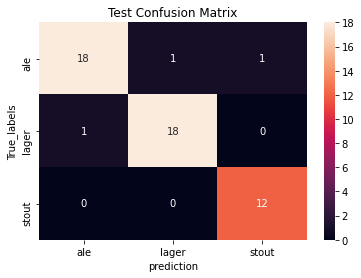

In [ ]:
confusionmatrix_all(act,pred)

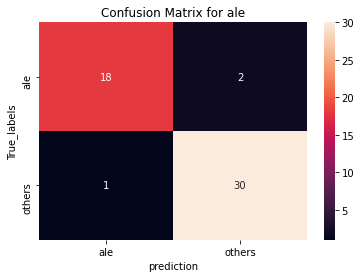

In [ ]:
confusionmatrix_individual(act,pred,'ale')
#confusionmatrix_individual(act,pred,'stout')
#confusionmatrix_individual(act,pred,'lager')

### 5. Printing the ROC which was calculated for each fold in pt 4


In [ ]:
#print ROC for fold# -- pass fold value
# all_fold_roc_class[fold][class_label][FP rate/ TP rate / AUC score]

def print_ROC(fold):
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for fold %i' % (fold+1))
    for i in range(3):
        ax.plot(all_fold_roc_class[fold][0][i], all_fold_roc_class[fold][1][i], label='ROC curve (area = %0.2f) for label %i' % (all_fold_roc_class[fold][2][i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sn.despine()
    plt.show()

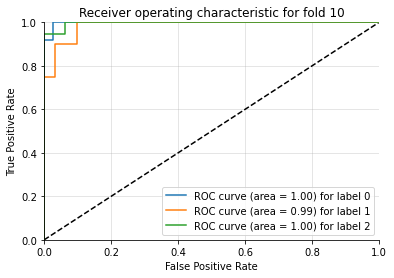

In [ ]:
print_ROC(9)

In [ ]:
# classification report for fold 10
from sklearn.metrics import classification_report

print('\nClassification Report\n')
print(classification_report(act, pred, target_names=['Stout', 'Ale', 'Lager']))


Classification Report

              precision    recall  f1-score   support

       Stout       0.95      0.90      0.92        20
         Ale       0.95      0.95      0.95        19
       Lager       0.92      1.00      0.96        12

    accuracy                           0.94        51
   macro avg       0.94      0.95      0.94        51
weighted avg       0.94      0.94      0.94        51



### Reference Logistic Regression from Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize 

In [ ]:
score_1 = list()
score_2 = list()

all_fold_roc_class_1 = list()

result_df_1 = pd.DataFrame(columns=['Fold','Logistic Regression score (%)'])
result_df_2 = pd.DataFrame(columns=['Fold','Logistic Regression score (%)'])

#KFold cross validation
for fold in range(10):
    
    train_X, test_X, train_y, test_y = train_test_split( X,y,test_size = 0.33,random_state=fold)
    
    logreg = LogisticRegression(multi_class='multinomial')
    logreg.fit( train_X, train_y )
    
    score_1.append(round(accuracy_score(test_y,logreg.predict( test_X ))*100,2))
    
    score_2.append(round(accuracy_score(train_y,logreg.predict( train_X ))*100,2))
    
    result_df_1.loc[fold] = [fold+1,score_1[fold]]
    
    result_df_2.loc[fold] = [fold+1,score_2[fold]]
    
    
display(result_df_1)
print("The overall score for Logistic Regression is: ", round(sum(score_1)/len(score_1),2),'%')

,Fold,Logistic Regression score (%)
0,1.0,96.08
1,2.0,96.08
2,3.0,92.16
3,4.0,96.08
4,5.0,94.12
5,6.0,96.08
6,7.0,94.12
7,8.0,94.12
8,9.0,98.04
9,10.0,96.08


The overall score for Logistic Regression is:  95.3 %


In [ ]:
beer_test_pred_1 = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

beer_test_pred_1 = beer_test_pred_1.replace({0: 'stout', 1:'ale', 2:'lager'})

In [ ]:
cm_test_1 = confusion_matrix( beer_test_pred_1.actual,
                            beer_test_pred_1.predicted)


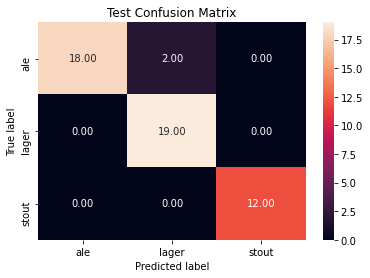

In [ ]:
sn.heatmap(cm_test_1, annot=True,  fmt='.2f', xticklabels = ["ale", "lager","stout"] , yticklabels =["ale", "lager","stout"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Test Confusion Matrix')
plt.savefig('Test_CM.jpg')

In [ ]:
# Compute ROC curve and ROC area for each class
    #fold_roc_class = list()
LR_fpr = dict()
LR_tpr = dict()
LR_roc_auc = dict()
for i in range(3):
    fold_y_true = label_binarize(test_y,classes=[0,1,2])[:,i]
    class_pred = np.array(logreg.predict_proba( test_X ))[:,i]
    LR_fpr[i], LR_tpr[i], thrs = roc_curve(fold_y_true, class_pred)
    LR_roc_auc[i] = auc(LR_fpr[i], LR_tpr[i])

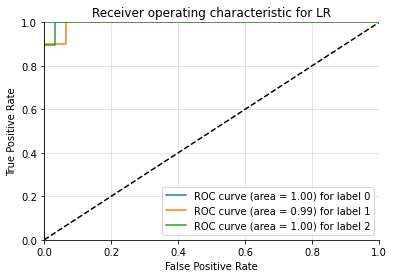

In [ ]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic for LR')
for i in range(3):
    ax.plot(LR_fpr[i], LR_tpr[i], label='ROC curve (area = %0.2f) for label %i' % (LR_roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sn.despine()
plt.show()

In [ ]:
print('\nClassification Report\n')
print(classification_report(beer_test_pred_1.actual,beer_test_pred_1.predicted, target_names=['Stout', 'Ale', 'Lager']))


Classification Report

              precision    recall  f1-score   support

       Stout       1.00      0.90      0.95        20
         Ale       0.90      1.00      0.95        19
       Lager       1.00      1.00      1.00        12

    accuracy                           0.96        51
   macro avg       0.97      0.97      0.97        51
weighted avg       0.96      0.96      0.96        51

